<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_09_Artificial_Neural_Network/Overfitting_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting and Underfitting

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0 \
  tensorflow==2.19.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection 
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

# # Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# # Normalize the images.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 


X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


## Overfitting

In [ ]:
# Build the model.
model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
], name="OverFitANN")

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy'],
)

# Train the model.
history = model.fit(
  X_train, to_categorical(y_train),
  validation_data=(X_test, to_categorical(y_test)),
  verbose=2,
  epochs=50,
  batch_size=64 )

Epoch 1/50
938/938 - 9s - loss: 0.6584 - categorical_accuracy: 0.8153 - val_loss: 0.2633 - val_categorical_accuracy: 0.9307 - 9s/epoch - 10ms/step
Epoch 2/50
938/938 - 3s - loss: 0.2001 - categorical_accuracy: 0.9463 - val_loss: 0.1801 - val_categorical_accuracy: 0.9500 - 3s/epoch - 4ms/step
Epoch 3/50
938/938 - 3s - loss: 0.1281 - categorical_accuracy: 0.9649 - val_loss: 0.1603 - val_categorical_accuracy: 0.9543 - 3s/epoch - 3ms/step
Epoch 4/50
938/938 - 3s - loss: 0.0904 - categorical_accuracy: 0.9751 - val_loss: 0.1582 - val_categorical_accuracy: 0.9565 - 3s/epoch - 3ms/step
Epoch 5/50
938/938 - 4s - loss: 0.0665 - categorical_accuracy: 0.9810 - val_loss: 0.1443 - val_categorical_accuracy: 0.9594 - 4s/epoch - 4ms/step
Epoch 6/50
938/938 - 4s - loss: 0.0506 - categorical_accuracy: 0.9858 - val_loss: 0.1440 - val_categorical_accuracy: 0.9620 - 4s/epoch - 4ms/step
Epoch 7/50
938/938 - 3s - loss: 0.0384 - categorical_accuracy: 0.9892 - val_loss: 0.1580 - val_categorical_accuracy: 0.9588

In [4]:
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


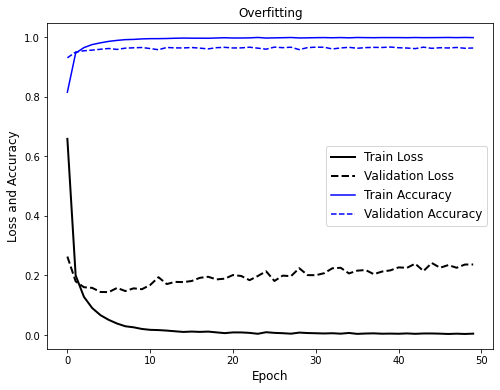

In [5]:
fig = plt.figure(figsize=(8,6))
plt.title('Overfitting')
plt.plot(history.history['loss'], label="Train Loss", c='k', lw=2)
plt.plot(history.history['val_loss'], label="Validation Loss", c='k', ls='--', lw=2)
plt.plot(history.history['categorical_accuracy'], label="Train Accuracy", c='blue')
plt.plot(history.history['val_categorical_accuracy'], label="Validation Accuracy", c='blue', ls='--')
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss and Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("overfitting.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## Underfitting

In [6]:
X_train1 = X_train[0:10000]
y_train1 = y_train[0:10000]

In [ ]:
# Build the model.
model1 = keras.Sequential([
  keras.Input(shape=(784,)),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(10, activation='softmax') 
], name="UnderFitANN")

# Compile the model.
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy'],
)

# Train the model.
history1 = model1.fit(
  X_train1, to_categorical(y_train1),
  validation_data=(X_test, to_categorical(y_test)),
  verbose=2,
  epochs=50,
  batch_size=64 )

Epoch 1/50
157/157 - 2s - loss: 1.4893 - categorical_accuracy: 0.6486 - val_loss: 1.1322 - val_categorical_accuracy: 0.8011 - 2s/epoch - 13ms/step
Epoch 2/50
157/157 - 1s - loss: 0.9494 - categorical_accuracy: 0.8452 - val_loss: 0.8310 - val_categorical_accuracy: 0.8625 - 669ms/epoch - 4ms/step
Epoch 3/50
157/157 - 1s - loss: 0.7082 - categorical_accuracy: 0.8840 - val_loss: 0.6590 - val_categorical_accuracy: 0.8773 - 675ms/epoch - 4ms/step
Epoch 4/50
157/157 - 1s - loss: 0.5621 - categorical_accuracy: 0.9006 - val_loss: 0.5526 - val_categorical_accuracy: 0.8863 - 716ms/epoch - 5ms/step
Epoch 5/50
157/157 - 1s - loss: 0.4688 - categorical_accuracy: 0.9089 - val_loss: 0.4878 - val_categorical_accuracy: 0.8932 - 678ms/epoch - 4ms/step
Epoch 6/50
157/157 - 1s - loss: 0.4052 - categorical_accuracy: 0.9180 - val_loss: 0.4427 - val_categorical_accuracy: 0.8979 - 683ms/epoch - 4ms/step
Epoch 7/50
157/157 - 1s - loss: 0.3590 - categorical_accuracy: 0.9246 - val_loss: 0.4127 - val_categorical_a

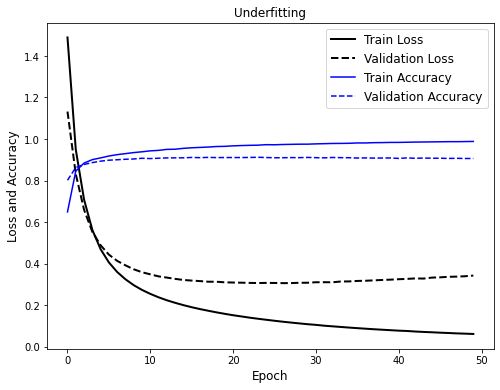

In [8]:
fig = plt.figure(figsize=(8,6))
plt.title('Underfitting')
plt.plot(history1.history['loss'], label="Train Loss", c='k', lw=2)
plt.plot(history1.history['val_loss'], label="Validation Loss", c='k', ls='--', lw=2)
plt.plot(history1.history['categorical_accuracy'], label="Train Accuracy", c='blue')
plt.plot(history1.history['val_categorical_accuracy'], label="Validation Accuracy", c='blue', ls='--')
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss and Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("underfitting.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## Appropriate Fitting

In [ ]:
# Build the model.
model2 = keras.Sequential([
  keras.Input(shape=(784,)),
  layers.Dense(64, activation='sigmoid'),
  layers.Dropout(0.35),
  layers.Dense(10, activation='softmax')
], name="AppropriateFitANN")

# Compile the model.
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['categorical_accuracy'],
)

# Train the model.
history2 = model2.fit(
  X_train, to_categorical(y_train),
  validation_data=(X_test, to_categorical(y_test)),
  verbose=2,
  epochs=50,
  batch_size=64 )

Epoch 1/50
938/938 - 4s - loss: 0.5586 - categorical_accuracy: 0.8418 - val_loss: 0.2718 - val_categorical_accuracy: 0.9215 - 4s/epoch - 4ms/step
Epoch 2/50
938/938 - 3s - loss: 0.3222 - categorical_accuracy: 0.9073 - val_loss: 0.2242 - val_categorical_accuracy: 0.9332 - 3s/epoch - 3ms/step
Epoch 3/50
938/938 - 3s - loss: 0.2739 - categorical_accuracy: 0.9202 - val_loss: 0.2045 - val_categorical_accuracy: 0.9392 - 3s/epoch - 3ms/step
Epoch 4/50
938/938 - 3s - loss: 0.2486 - categorical_accuracy: 0.9266 - val_loss: 0.1886 - val_categorical_accuracy: 0.9443 - 3s/epoch - 3ms/step
Epoch 5/50
938/938 - 3s - loss: 0.2294 - categorical_accuracy: 0.9325 - val_loss: 0.1799 - val_categorical_accuracy: 0.9471 - 3s/epoch - 3ms/step
Epoch 6/50
938/938 - 3s - loss: 0.2161 - categorical_accuracy: 0.9360 - val_loss: 0.1724 - val_categorical_accuracy: 0.9504 - 3s/epoch - 3ms/step
Epoch 7/50
938/938 - 3s - loss: 0.2054 - categorical_accuracy: 0.9389 - val_loss: 0.1668 - val_categorical_accuracy: 0.9514 

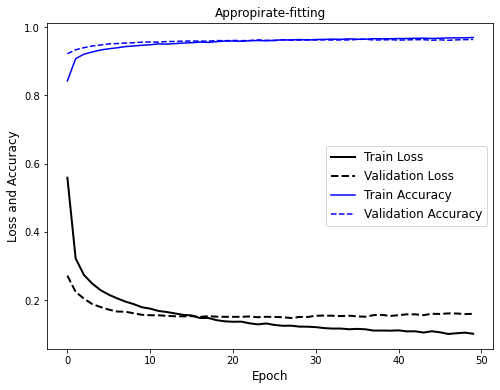

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.title('Appropirate-fitting')
plt.plot(history2.history['loss'], label="Train Loss", c='k', lw=2)
plt.plot(history2.history['val_loss'], label="Validation Loss", c='k', ls='--', lw=2)
plt.plot(history2.history['categorical_accuracy'], label="Train Accuracy", c='blue')
plt.plot(history2.history['val_categorical_accuracy'], label="Validation Accuracy", c='blue', ls='--')
plt.xlabel(r'Epoch', fontsize=12)
plt.ylabel(r'Loss and Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig("appropirate.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()